In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import praw
user_agent = "python_dash"
reddit = praw.Reddit(
    client_id="goZQcBaX6_T7Jw",
    client_secret="Qzx_RPCjba5xCwMoAU425q7RsEXYwA",
    user_agent=user_agent
)

In [12]:
# hot new rising top
headlines = set()
for submission in reddit.subreddit('options').hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

342


In [13]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Gimme your opinion on RKT play this week.
1,Remembering when I sold my GME shares a year a...
2,VIAC YOLO Update
3,Scorpio Tankers ($STNG) could be going to the ...
4,Cramer writes an op-ed on himself...


In [14]:
df.to_csv('wallstreetbets.csv', header=False, encoding='utf-8', index=False)

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aaminion/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line) # -> dict
    pol_score['headline'] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.34,
  'headline': 'Gimme your opinion on RKT play this week.',
  'neg': 0.0,
  'neu': 0.745,
  'pos': 0.255},
 {'compound': 0.4767,
  'headline': 'Remembering when I sold my GME shares a year ago not thinking they’d be worth '
              'anything 😢',
  'neg': 0.0,
  'neu': 0.745,
  'pos': 0.255},
 {'compound': 0.4278, 'headline': 'VIAC YOLO Update', 'neg': 0.0, 'neu': 0.414, 'pos': 0.586}]


In [17]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,0.745,0.255,0.3400,Gimme your opinion on RKT play this week.
1,0.0,0.745,0.255,0.4767,Remembering when I sold my GME shares a year a...
2,0.0,0.414,0.586,0.4278,VIAC YOLO Update
3,0.0,0.803,0.197,0.4926,Scorpio Tankers ($STNG) could be going to the ...
4,0.0,1.000,0.000,0.0000,Cramer writes an op-ed on himself...


In [18]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1

In [20]:
df2 = df[['headline','label']]

In [22]:
df2.to_csv('wsb_headlines_labels.csv', encoding='utf-8', index=False)

In [23]:
df.label.value_counts()

 0    161
 1    135
-1     46
Name: label, dtype: int64

In [25]:
df.label.value_counts(normalize=True) * 100

 0    47.076023
 1    39.473684
-1    13.450292
Name: label, dtype: float64

In [26]:
print("Positive wsb headlines:\n")
pprint(list(df[df['label'] == 1 ].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive wsb headlines:

['Gimme your opinion on RKT play this week.',
 'Remembering when I sold my GME shares a year ago not thinking they’d be worth anything 😢',
 'VIAC YOLO Update',
 'Scorpio Tankers ($STNG) could be going to the Moon for Actual Good Economic Reasons!',
 'Great diversity 🚀 🚀 🚀']

Negative headlines:

['Dan Gilbert’s dividend on his RKT stock will be over 2 billion dollars - where do you think he’s going to reinvest that dividend? Plus he committed to a 1 billion dollar buy back program. Dan '
 'hates the short sellers suppression of his company stock. I’m betting big on RKT and Dan.',
 'Bought shares on margin, sold covered calls increasing my margin availibility. Having over 100% is new to me. Am I fucked?',
 'Everybody makes mistakes...sometimes that mistake is dumping $TSLA at $70/share...',
 "Panic bought 7 shares and avg up? I don't give a F. Just numb holding till the fkin end!",
 '$GME: I still didn’t hear no BELL!! 🚀🚀🚀 (Short version)']


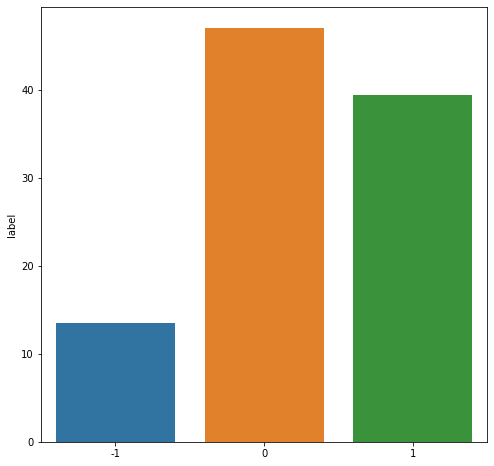

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)